In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#show all prints
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### Load Data

In [2]:
df = pd.read_csv("../../data/raw/Reviews.csv")


In [5]:
df.shape
df.describe()
print("Show Nan\n ")
df.isna().sum()
print("For the targeted Models the columns Score and Summary are important\nHence the rows with NAN in the respective columns will be droped")
df = df.loc[~df["Summary"].isna()]
df.isna().sum()

(568427, 10)

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568427.000000,568427.000000,568427.000000,568427.000000,5.684270e+05
mean,284226.997502,1.743855,2.227859,4.183299,1.296262e+09
std,164099.775825,7.636692,8.288679,1.310385,4.803749e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142112.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426343.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


Show Nan
 


Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
dtype: int64

For the targeted Models the columns Score and Summary are important
Hence the rows with NAN in the respective columns will be droped


Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
dtype: int64

### Drop Duplicates considering only `Score` `Text` & `Summary`

In [4]:
num_dups = df.duplicated(subset=["Summary", "Score", "Text"]).sum()
print(f"{num_dups} entries ({(num_dups/df.shape[0])*100:.2f}%) data is duplicated")

173424 entries (30.51%) data is duplicated


##### drop duplicated data and remove not needed columns and store new dataframe

In [16]:
df_inter = df.drop_duplicates(subset=["Summary","Score","Text"])
df_inter = df_inter.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator','Time'])
df_inter.shape
df_inter.to_csv("../../data/intermediate/food_reviews.csv", index=False)

(395003, 3)

In [8]:
df_inter.columns

Index(['Score', 'Summary', 'Text'], dtype='object')

# PreProcessing
##### Column `Summary` & `Text` will be processed at the same time

In [139]:
df = pd.read_csv("../../data/intermediate/food_reviews.csv") 

### Lower casing -not done - reason: casing contains infomation

### Removal of Puncuations

In [140]:
PUNCT_TO_REMOVE = '"#$%&*+,-./=?@[\\]^_`{|}~;'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [141]:
df["Summary_processed"] = df["Summary"].apply(lambda summary: remove_punctuation(summary))
df["Text_processed"] = df["Text"].apply(lambda text: remove_punctuation(text))
df[["Text","Text_processed", "Summary", "Summary_processed"]].sample()

,Text,Text_processed,Summary,Summary_processed
155829,1 out of 6 bulbs was defective and fizzled out after approximately 10 seconds of being powered on. Doubt I can return just the 1 for a partial refund so I'd recommend for people to buy bulbs individually because of this. The 6 for under $50 deal is good but its really 5 for $50 which is just average. Not to mention the bulbs don't seem quite as sturdy as I'd have hoped them to.<br /><br />Update 3/21 another bulb has burnt out shortly after buying. Now leaving 1 star on this item. Never been unhappy with an item from amazon before...,1 out of 6 bulbs was defective and fizzled out after approximately 10 seconds of being powered on Doubt I can return just the 1 for a partial refund so I'd recommend for people to buy bulbs individually because of this The 6 for under 50 deal is good but its really 5 for 50 which is just average Not to mention the bulbs don't seem quite as sturdy as I'd have hoped them to<br ><br >Update 321 another bulb has burnt out shortly after buying Now leaving 1 star on this item Never been unhappy with an item from amazon before,2 out of 6 broken,2 out of 6 broken


### RegEx for `!`. 
##### Exclamation mark semms to be a good indicator for the extreme

In [142]:
import re
def findExclmaionMarkAndSetWhitespacesAround(str):
        return re.sub('\\b!',' !',str)



In [143]:
df["Summary_processed"] = df["Summary_processed"].apply(lambda summary: findExclmaionMarkAndSetWhitespacesAround(summary) )
df["Text_processed"] = df["Text_processed"].apply(lambda text: findExclmaionMarkAndSetWhitespacesAround(text) )

In [123]:
df.sample(40)

,Score,Summary,Text,Summary_processed,Text_processed
317400,4,Better than expected,"I love sweet tea but I don't drink sugary tea very much (it's not that good for me). As a result, I've tried a lot of tea-flavored powdered water enhancers but they all had a funny after taste. The MIO sweet tea didn't have any such after taste. I'm not saying that it tastes like my best home-made tea but it's not bad. In fact, it's pretty good.<br /><br />As an extra bonus, MIO doesn't need to be refrigerated after opening which means you can toss it into your gym bag and the lid seems pretty secure although I would probably put in a ziplock bag first (I've had to deal with the trauma of cleaning up a shampoo spill in my gym bag-never again!).<br /><br />I'm looking forward to try some of the fruit flavors next.",Better than expected,I love sweet tea but I don't drink sugary tea very much (it's not that good for me) As a result I've tried a lot of teaflavored powdered water enhancers but they all had a funny after taste The MIO sweet tea didn't have any such after taste I'm not saying that it tastes like my best homemade tea but it's not bad In fact it's pretty good<br ><br >As an extra bonus MIO doesn't need to be refrigerated after opening which means you can toss it into your gym bag and the lid seems pretty secure although I would probably put in a ziplock bag first (I've had to deal with the trauma of cleaning up a shampoo spill in my gym bagnever again !)<br ><br >I'm looking forward to try some of the fruit flavors next
297573,5,Salty.,"Table salt is great. A word of caution - salt tastes very salty. Why are you reading this, its salt for Pete's sake? I am pretty sure Iodized table salt has iodine in it. I do suggest buying this at a grocery store like a person to save about 7 dollars from the shipping cost.",Salty,Table salt is great A word of caution salt tastes very salty Why are you reading this its salt for Pete's sake I am pretty sure Iodized table salt has iodine in it I do suggest buying this at a grocery store like a person to save about 7 dollars from the shipping cost
329896,3,Really not that great...,"I must have had this oil in my Amazon cart for two years, always debating if I should give it a try. Finally I did. I was really disappointed. I really find this oil very average. It does smell nice but the flavor is somewhat weak, a little bland. I guess because of the great reviews I expected more. I suppose for general cooking this oil would be nice, but i wouldnt use it for a salad if I wanted to impress someone.<br />By the way, if you ever want to taste a great oil, see if you can get your hands on ""Protoulis"" oil from Greece. So far it's the best oil I have ever come across.",Really not that great,I must have had this oil in my Amazon cart for two years always debating if I should give it a try Finally I did I was really disappointed I really find this oil very average It does smell nice but the flavor is somewhat weak a little bland I guess because of the great reviews I expected more I suppose for general cooking this oil would be nice but i wouldnt use it for a salad if I wanted to impress someone<br >By the way if you ever want to taste a great oil see if you can get your hands on Protoulis oil from Greece So far it's the best oil I have ever come across
105138,5,Great tasting and good price,"First off i am not sure what people expect. This Fr Vanilla Cap has a great taste, creamy texture and needs nothing added to it.<br />But AGAIN, i read the product info and it stated (sugar/sucralose blend)<br /><br />I use SPLENDA brand sucralose anyway in my coffee. If you do not like the artificial sweetener, then do not order this product. But do not vote it down because you didn't read the info and/or sucralose leaves an after-taste.<br />I have no after-taste from it and therefore I enjoy this product very much.<br /><br />I use this in the B60 Keurig on the middle setting (8oz if i remember correctly)<br />My Pros:<br /

### Removal of Stopwords

In [144]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["Text_processed"] = df["Text_processed"].apply(lambda text: remove_stopwords(text))
df["Summary_processed"] = df["Summary_processed"].apply(lambda text: remove_stopwords(text))

In [145]:
df.sample(5)

,Score,Summary,Text,Summary_processed,Text_processed
279833,5,Paradise Cherry Pineapple Mix,I was very pleased with the Paradise Cherry Pineapple and extra fancy fruit mixes. I gave a couple away as holiday gifts and used some in fruit cakes and fruited breads to many compliments. I will buy this product again.,Paradise Cherry Pineapple Mix,I pleased Paradise Cherry Pineapple extra fancy fruit mixes I gave couple away holiday gifts used fruit cakes fruited breads many compliments I buy product
165820,5,"Hydration , what a perfect product to give instant Hydration, and is so tastey. Great for patients going through radiation thera","While myself and my sister are undergoing treatment for cancer, was advised to try this product Vita Coco Coconut water, what a difference it made immediately.<br />Hydration is so important while undergoing radiation, or chemo ,<br />Vita Coco, fits right into a program to help hydrate and keep your vital organs, protected.<br /><br />Will drink it forever.<br />Thanks Jene Fielder",Hydration perfect product give instant Hydration tastey Great patients going radiation thera,While sister undergoing treatment cancer advised try product Vita Coco Coconut water difference made immediately<br >Hydration important undergoing radiation chemo <br >Vita Coco fits right program help hydrate keep vital organs protected<br ><br >Will drink forever<br >Thanks Jene Fielder
186185,4,Different but good,"The first thing I noticed when I opened the box was that every bar wrapper was oily. Don't know if something leaked or it came like that from the factory. So far every bar has been well sealed. I wasn't thrilled with the first bite because I was expecting something sweeter and dryer like I have had in the past. But now that I'm used to the taste and texture I really like them. They even feel healthy. They are very filling and make me feel that I had a nutritious snack. You might want to try one before buying a whole box, but I do find them quite tasty",Different good,The first thing I noticed I opened box every bar wrapper oily Don't know something leaked came like factory So far every bar well sealed I thrilled first bite I expecting something sweeter dryer like I past But I'm used taste texture I really like They even feel healthy They filling make feel I nutritious snack You might want try one buying whole box I find quite tasty
20106,4,TAYLORS DARJEELING,I usually buy loose leaf Taylors Darjeeling tea. However I can no longer find Taylors loose leaf Darjeeling tea and was told hat Taylors no longer sells it. I have searched all over and this seems to be the case so when i saw taylors darjeeling in the tea bag form i bought it since i will not be able to buy it in the future. This is the same tea as loose only in bag form. i hope this remains available in the future. I have not found a darjeeling tea in loose leaf that compares to the darjeeling tea that taylors sold in the past.,TAYLORS DARJEELING,I usually buy loose leaf Taylors Darjeeling tea However I longer find Taylors loose leaf Darjeeling tea told hat Taylors longer sells I searched seems case saw taylors darjeeling tea bag form bought since able buy future This tea loose bag form hope remains available future I found darjeeling tea loose leaf compares darjeeling tea taylors sold past
315799,4,kitten food okay for cat,"just adopted Beau from a lady who was too sick to take care of him. she recommended royal canin, so I ordered a case and later noticed that the kitten version was chosen. he loved it nevertheless, and is very healthy and playful. it's a little pricey, but since he's doing so well, I plan to continue with this brand. I'll just make sure to pick the adult formula from now on. by the way, Beau the cat adores his new brother, fang the dog. they are pretty funny together.",kitten food okay cat,adopted Beau lady sick take care recommended royal canin I ordered case later noticed kitten version chosen loved nevertheless healthy playful little pri

### Removal of Frequent words

In [146]:
from collections import Counter
cntSummary = Counter()
for text in df["Summary_processed"].values:
    for word in text.split():
        cntSummary[word] += 1
        
cntSummary.most_common(15)

ctnText =  Counter()
for text in df["Text_processed"].values:
    for word in text.split():
        ctnText[word] += 1
ctnText.most_common(15)

[('!', 81782),
 ('Great', 34400),
 ('good', 17520),
 ('Good', 17230),
 ('I', 13848),
 ('great', 13641),
 ('Best', 13033),
 ('Not', 10997),
 ('product', 9743),
 ('The', 9511),
 ('My', 9310),
 ('Delicious', 9198),
 ('coffee', 8960),
 ('A', 8820),
 ('best', 8573)]

[('I', 965373),
 ('!', 180804),
 ('><br', 179163),
 ('like', 165157),
 ('The', 137548),
 ('good', 125874),
 ('taste', 112552),
 ('one', 103401),
 ('product', 102933),
 ('This', 100298),
 ('It', 99686),
 ('flavor', 94424),
 ('great', 94367),
 ('coffee', 87889),
 ('tea', 81817)]

#### remove `I` `The` `the` `This`def remove_freqwords(text): (maybe further cleaning necessary)

In [147]:
FREQWORDS = set(['I','The', 'the', 'This', 'this', 'A', 'a', 'it', 'these', 'These'])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["Text_processed"] = df["Text_processed"].apply(lambda text: remove_freqwords(text))
df["Summary_processed"] = df["Summary_processed"].apply(lambda text: remove_freqwords(text))


### Stemming 

In [148]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
#long processinng!
df["Text_processed_w_stemming"] = df["Text_processed"].apply(lambda text: stem_words(text))

df.sample(40)

,Score,Summary,Text,Summary_processed,Text_processed,Text_processed_w_stemming
249036,5,Good as sugar,"I use this to cook with and feel better that I am not eating sugar, and this is supposed to be healthier than other sugar substitutes.",Good sugar,use cook feel better eating sugar supposed healthier sugar substitutes,use cook feel better eat sugar suppos healthier sugar substitut
52001,5,excellent dog treats when cut up. Good value,I cut these up one inch at a time and give them as treats to my dog. He loves them. I freeze them as a bag of 1 inch disks that I take out of the freezer one at a time. It's a good value and comparable to other pre-cut-up treats. They can also be used as meals.,excellent dog treats cut Good value,cut one inch time give treats dog He loves freeze bag 1 inch disks take freezer one time It's good value comparable precutup treats They also used meals,cut one inch time give treat dog he love freez bag 1 inch disk take freezer one time it' good valu compar precutup treat they also use meal
113940,5,all delicious! will buy again,"Every one of these soups was delicious! I found them to be very versatile, as well. I added ingredients here or there--whatever I happened to have in the cupboard/freezer, like black beans, green chilies, chicken breast, etc.--and these soups really impressed. I was particularly excited about the low sodium and low calories in the soups. I'm on a low fat/low calorie diet, and these worked out tremendously well for me. I'm definitely going to buy these again!",delicious ! buy,Every one soups delicious ! found versatile well added ingredients therewhatever happened cupboardfreezer like black beans green chilies chicken breast etcand soups really impressed particularly excited low sodium low calories soups I'm low fatlow calorie diet worked tremendously well I'm definitely going buy !,everi one soup delici ! found versatil well ad ingredi therewhatev happen cupboardfreez like black bean green chili chicken breast etcand soup realli impress particularli excit low sodium low calori soup i'm low fatlow calori diet work tremend well i'm definit go buy !
160660,5,Stop Freaking Out Over BPA,"Okay. Im a very cautious parent, but the fact that there is BPA in the lids doesnt affect the food or the quality of it. BPA is an element in plastics that is excess estrogen and its recently become known that its not beneficial to let it enter our bodies. However, BPA is only activated once its been heated and since you arent heating the metal lid, the BPA never enters the food. EB baby food is spectacular especially since its jar food vs frozen/fresh. There are lots of yummy flavors and your baby will probably like most of them. Both of my sons go crazy over the EB varieties and I stick by it- buying it by the case and using the amazon subscription option makes it soo much cheaper than retail! Again... dont freak out over BPA in the lids lol.",Stop Freaking Out Over BPA,Okay Im cautious parent fact BPA lids doesnt affect food quality BPA element plastics excess estrogen recently become known beneficial let enter bodies However BPA activated heated since arent heating metal lid BPA never enters food EB baby food spectacular especially since jar food vs frozenfresh There lots yummy flavors baby probably like Both sons go crazy EB varieties stick buying case using amazon subscription option makes soo much cheaper retail ! Again dont freak BPA lids lol,okay im cautiou parent fact bpa lid doesnt affect food qualiti bpa element plastic excess estrogen recent becom known benefici let enter bodi howev bpa activ heat sinc arent heat metal lid bpa never enter food eb babi food spectacular especi sinc jar food vs frozenfresh there lot yummi flavor babi probabl like both son go crazi eb varieti stick buy case use amazon subscript option make soo much cheaper retail ! again dont freak bpa lid lol
10399,5,Works great with a Keurig Brewer !!!,I really love my Keurig brewer but after my third purchase of highly pr

### Lemmatization

In [133]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["Text_processed_w_stemming"].apply(lambda text: lemmatize_words(text))
df.head()

,Score,Summary,Text,Summary_processed,Text_processed,Text_processed_wo_frequent_words,Text_processed_w_stemming,text_lemmatized
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,Good Quality Dog Food,bought several Vitality canned dog food products found good quality product looks like stew processed meat smells better My Labrador finicky appreciates product better,bought several Vitality canned dog food products found good quality product looks like stew processed meat smells better My Labrador finicky appreciates product better,bought sever vital can dog food product found good qualiti product look like stew process meat smell better my labrador finicki appreci product better,bought sever vital can dog food product found good qualiti product look like stew process meat smell better my labrador finicki appreci product better
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not Advertised,Product arrived labeled Jumbo Salted Peanutsthe peanuts actually small sized unsalted Not sure error vendor intended represent product Jumbo,Product arrived labeled Jumbo Salted Peanutsthe peanuts actually small sized unsalted Not sure error vendor intended represent product Jumbo,product arriv label jumbo salt peanutsth peanut actual small size unsalt not sure error vendor intend repres product jumbo,product arriv label jumbo salt peanutsth peanut actual small size unsalt not sure error vendor intend repres product jumbo
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",Delight says,confection around centuries It light pillowy citrus gelatin nuts case Filberts And cut tiny squares liberally coated powdered sugar And tiny mouthful heaven Not chewy flavorful highly recommend yummy treat If familiar story CS Lewis' Lion Witch Wardrobe treat seduces Edmund selling Brother Sisters Witch,confection around centuries It light pillowy citrus gelatin nuts case Filberts And cut tiny squares liberally coated powdered sugar And tiny mouthful heaven Not chewy flavorful highly recommend yummy treat If familiar story CS Lewis' Lion Witch Wardrobe treat seduces Edmund selling Brother Sisters Witch,confect around centuri it light pillowi citru gelatin nut case filbert and cut tini squar liber coat powder sugar and tini mouth heaven not chewi flavor highli recommend yummi treat if familiar stori cs lewis' lion witch wardrob treat seduc edmund sell brother sister witch,confect around centuri it light pillowi citru gelatin nut case filbert and cut tini squar liber coat powder sugar and tini mouth heaven not chewi flavor highli recommend yummi treat if familiar stori c lewis' lion witch wardrob treat seduc edmund sell brother sister witch
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,Cough Medicine,If looking secret ingredient Robitussin believe found got addition Root Beer Extract ordered (which good) made cherry soda flavor medicinal,If looking secret ingredient Robitussin believe found got addi

### check for emojis/emoticons

In [149]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [150]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

print(remove_emoticons("Hello :)"))

Hello 


In [151]:
df_save = df

In [152]:
df["Text_processed"] = df["Text_processed"].apply(lambda text: convert_emoticons(text))
df["Summary_processed"] = df["Summary_processed"].apply(lambda text: convert_emoticons(text))


### removal of URLs

In [155]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["Text_processed"] = df["Text_processed"].apply(lambda text: remove_urls(text))
df["Summary_processed"] = df["Summary_processed"].apply(lambda text: remove_urls(text))


### removal of HTML tags

In [156]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df["Text_processed"] = df["Text_processed"].apply(lambda text: remove_html(text))
df["Summary_processed"] = df["Summary_processed"].apply(lambda text: remove_html(text))



### spelling correction

In [ ]:
from spellchecker import SpellChecker
from textblob import TextBlob

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
#time consuming!!!!!!!       
#df["Text_processed"] = df["Text_processed"].apply(lambda text: correct_spellings(text))
#df["Summary_processed"] = df["Summary_processed"].apply(lambda text: correct_spellings(text))

def correct_spellings2(text):
    return TextBlob(text).correct()

print(TextBlob("The worng computre is frmo me. I lov u").correct())
print(correct_spellings("The worng computre is frmo me. I lov u"))

print(correct_spellings2("why are u here?"))
df.iloc[10:11,4:5].to_string()
df_foo = (df["Summary_processed"].apply(lambda text : correct_spellings2(text)))

print(df.iloc[1:2,3])

In [248]:
from collections import Counter
print(len(df.iloc[1:2,4].str.split()))

1


### shorting o strings to `Summary` &`Text`

# Processing Checkup

In [256]:
print("Summary - max length of words: {}".format(df['Summary_processed'].str.split().str.len().max()))
print("Text - max length of words: {}".format(df['Text_processed'].str.split().str.len().max()))

Summary - max length of words: 27
Text - max length of words: 2023


##### The max lengt of words should be below 512. Checking for entries over 512 words

<AxesSubplot:ylabel='Frequency'>

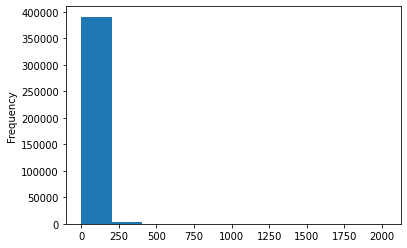

In [264]:
df['Text_processed'].str.split().str.len().plot.hist()

In [263]:
def wrdscount(n):
    i =0
    if n > 500:
        i = i+1
    

wordLengthSeries = df['Text_processed'].str.split().str.len()
wordsOver500 = 0
for w in wordLengthSeries:
    if w >500:
        wordsOver500 = wordsOver500 +1
print(wordsOver500)

187


#### There are 187 entries with more than 500 words.
#### Keeping them for training. -> will be cut by 'HEAD+TAIL' method from `How to Fine-Tune BERT for Text Classification?` https://arxiv.org/pdf/1905.05583.pdf

In [268]:
df.shape

(395003, 6)

#### Alternatively: Drop entries with more than 500 words for Training

In [308]:
lenthOfWordsInText= df['Text_processed'].str.split().str.len()

for index,w in enumerate(lenthOfWordsInText):
    if w >= 500:
        df.drop(index, inplace=True)

df.shape

(394815, 6)

In [309]:
df.head()

,Score,Summary,Text,Summary_processed,Text_processed,Text_processed_w_stemming
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,Good Quality Dog Food,bought several Vitality canned dog food products found good quality product looks like stew processed meat smells better My Labrador finicky appreciates product better,bought sever vital can dog food product found good qualiti product look like stew process meat smell better my labrador finicki appreci product better
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not Advertised,Product arrived labeled Jumbo Salted Peanutsthe peanuts actually small sized unsalted Not sure error vendor intended represent product Jumbo,product arriv label jumbo salt peanutsth peanut actual small size unsalt not sure error vendor intend repres product jumbo
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",Delight says,confection around centuries It light pillowy citrus gelatin nuts case Filberts And cut tiny squares liberally coated powdered sugar And tiny mouthful heaven Not chewy flavorful highly recommend yummy treat If familiar story CS Lewis' Lion Witch Wardrobe treat seduces Edmund selling Brother Sisters Witch,confect around centuri it light pillowi citru gelatin nut case filbert and cut tini squar liber coat powder sugar and tini mouth heaven not chewi flavor highli recommend yummi treat if familiar stori cs lewis' lion witch wardrob treat seduc edmund sell brother sister witch
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,Cough Medicine,If looking secret ingredient Robitussin believe found got addition Root Beer Extract ordered (which goodConfusion made cherry soda flavor medicinal,if look secret ingredi robitussin believ found got addit root beer extract order (which good) made cherri soda flavor medicin
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",Great taffy,Great taffy great price There wide assortment yummy taffy Delivery quick If taffy lover deal,great taffi great price there wide assort yummi taffi deliveri quick if taffi lover deal


In [312]:
df.loc[df["Score"].isin([1, 2, 3]), "Class_numerical"] = "0"
df.loc[df["Score"].isin([4, 5]), "Class_numerical"] = "1"

In [313]:
df.head()

,Score,Summary,Text,Summary_processed,Text_processed,Text_processed_w_stemming,Class,Class_numerical
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,Good Quality Dog Food,bought several Vitality canned dog food products found good quality product looks like stew processed meat smells better My Labrador finicky appreciates product better,bought sever vital can dog food product found good qualiti product look like stew process meat smell better my labrador finicki appreci product better,Positive,1
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not Advertised,Product arrived labeled Jumbo Salted Peanutsthe peanuts actually small sized unsalted Not sure error vendor intended represent product Jumbo,product arriv label jumbo salt peanutsth peanut actual small size unsalt not sure error vendor intend repres product jumbo,Negative,0
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",Delight says,confection around centuries It light pillowy citrus gelatin nuts case Filberts And cut tiny squares liberally coated powdered sugar And tiny mouthful heaven Not chewy flavorful highly recommend yummy treat If familiar story CS Lewis' Lion Witch Wardrobe treat seduces Edmund selling Brother Sisters Witch,confect around centuri it light pillowi citru gelatin nut case filbert and cut tini squar liber coat powder sugar and tini mouth heaven not chewi flavor highli recommend yummi treat if familiar stori cs lewis' lion witch wardrob treat seduc edmund sell brother sister witch,Positive,1
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,Cough Medicine,If looking secret ingredient Robitussin believe found got addition Root Beer Extract ordered (which goodConfusion made cherry soda flavor medicinal,if look secret ingredi robitussin believ found got addit root beer extract order (which good) made cherri soda flavor medicin,Negative,0
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",Great taffy,Great taffy great price There wide assortment yummy taffy Delivery quick If taffy lover deal,great taffi great price there wide assort yummi taffi deliveri quick if taffi lover deal,Positive,1


In [315]:
df_final = df.drop(columns=["Summary","Text","Text_processed_w_stemming"])

In [317]:
df_final.sample()

,Score,Summary_processed,Text_processed,Class,Class_numerical
328441,4,Excellent price texture taste please offer salt added option,great pantry Organic sweet taste decent texture canned product Not sure BPA Libby's offer salt added option line organic canned vegetables company Naturals line canned vegetables salt added organic product 15 daily value sodium per serving 35 servings per,Positive,1


In [320]:
df_final.to_csv("../../data/processed/Reviews_processed_binary_classification.csv")